In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing


from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error 
from sklearn.metrics import mean_absolute_error


            Passengers
Month                 
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121
...                ...
1960-08-01         606
1960-09-01         508
1960-10-01         461
1960-11-01         390
1960-12-01         432

[144 rows x 1 columns]


<AxesSubplot:xlabel='Month'>

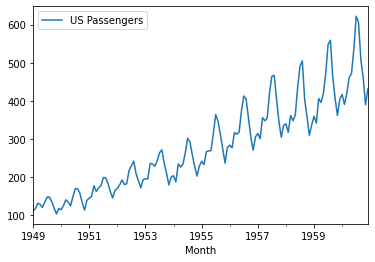

In [4]:
# Read and plot data 
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'

df = pd.read_csv(url,index_col='Month',parse_dates=True)
df.index.freq = 'MS'
print(df)
df['Passengers'].plot(legend=True,label='US Passengers')


In [5]:
# Train and Test data Splitting
train = df.iloc[:108]
test = df.iloc[108:] #last 36


### Holt winter's method

In [7]:
hw = ExponentialSmoothing(train['Passengers'],
                            trend='add',
                            seasonal='mul',
                            seasonal_periods=12).fit()
hw_predictions = hw.forecast(36).rename('Holt Forecast')
print(hw_predictions)



1958-01-01    343.512286
1958-02-01    335.465626
1958-03-01    388.892585
1958-04-01    378.397417
1958-05-01    379.938226
1958-06-01    436.156067
1958-07-01    483.418958
1958-08-01    478.117262
1958-09-01    420.102905
1958-10-01    365.360927
1958-11-01    319.756948
1958-12-01    360.614328
1959-01-01    368.524249
1959-02-01    359.744376
1959-03-01    416.869290
1959-04-01    405.456885
1959-05-01    406.946928
1959-06-01    466.978541
1959-07-01    517.381422
1959-08-01    511.511746
1959-09-01    449.275531
1959-10-01    390.586208
1959-11-01    341.707343
1959-12-01    385.228657
1960-01-01    393.536213
1960-02-01    384.023127
1960-03-01    444.845995
1960-04-01    432.516353
1960-05-01    433.955629
1960-06-01    497.801015
1960-07-01    551.343885
1960-08-01    544.906230
1960-09-01    478.448157
1960-10-01    415.811489
1960-11-01    363.657738
1960-12-01    409.842985
Freq: MS, Name: Holt Forecast, dtype: float64


/Users/gabrieldiasmp/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
/Users/gabrieldiasmp/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


<AxesSubplot:xlabel='Month'>

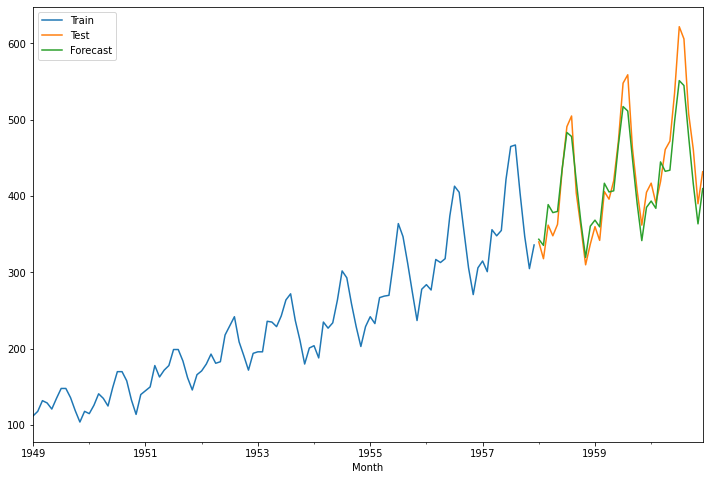

In [8]:
train['Passengers'].plot(legend=True,label='Train')
test['Passengers'].plot(legend=True,label='Test',figsize=(12,8))
hw_predictions.plot(legend=True,label='Forecast')


In [9]:
# Forecast Accuracy Measures
rmse = round(np.sqrt(mean_squared_error(test,hw_predictions)),2)
print("Root Mean Squared Error (RMSE) =",rmse)

mae = round(mean_absolute_error(test,hw_predictions),2)
print("Mean Absolute Error (MAE) =",mae)

mape = round(100*mean_absolute_percentage_error(test,hw_predictions),2)
print("Mean Absolute Percentual Error (MAPE) =",mape,'%')

maen = round(mean_absolute_error(test[1:],test[:-1]),2)
print("Mean Absolute Error for Naive Forecast (MAEN) =",maen)


Root Mean Squared Error (RMSE) = 27.37
Mean Absolute Error (MAE) = 22.63
Mean Absolute Percentual Error (MAPE) = 5.07 %
Mean Absolute Error for Naive Forecast (MAEN) = 43.43


/Users/gabrieldiasmp/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
/Users/gabrieldiasmp/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


<AxesSubplot:xlabel='Month'>

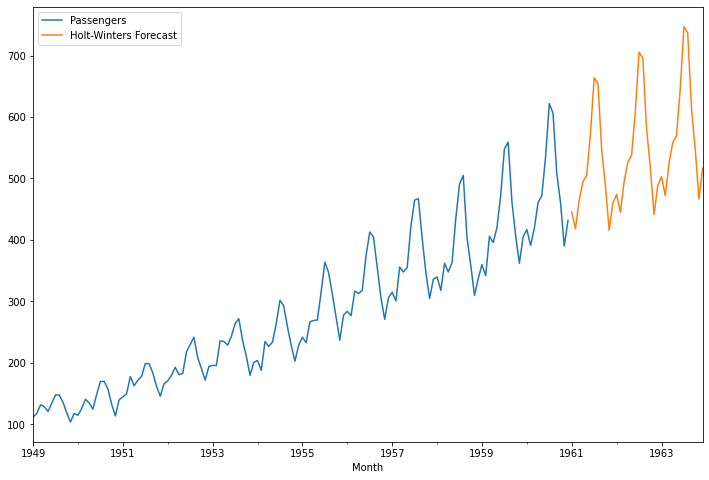

In [11]:
# Forecast the next 36 observations
hwf = ExponentialSmoothing(df['Passengers'],
                               trend='add',
                               seasonal='mul',
                               seasonal_periods=12).fit()
forecasts = hwf.forecast(36).rename('Holt Forecast')
df['Passengers'].plot(legend=True,label='Passengers',figsize=(12,8))
forecasts.plot(legend=True,label='Holt-Winters Forecast')

### Single method

/Users/gabrieldiasmp/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
/Users/gabrieldiasmp/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


<AxesSubplot:xlabel='Month'>

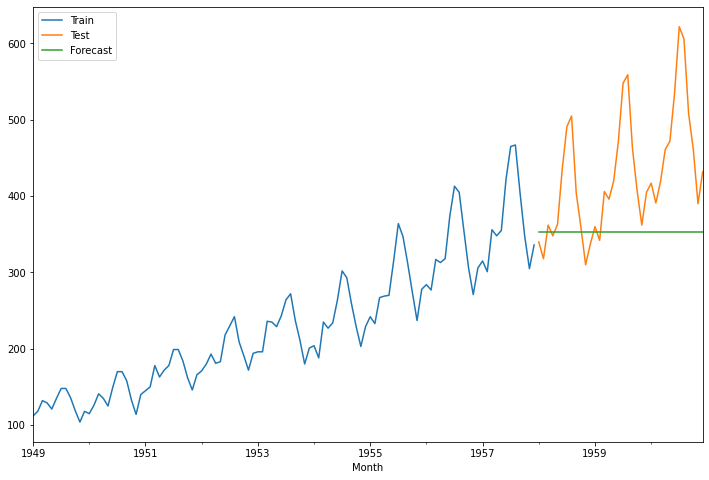

In [15]:
single = SimpleExpSmoothing(train['Passengers']).fit(
                            smoothing_level=0.1, optimized=False)
single_predictions = single.forecast(36).rename('Holt Forecast')

train['Passengers'].plot(legend=True,label='Train')
test['Passengers'].plot(legend=True,label='Test',figsize=(12,8))
single_predictions.plot(legend=True,label='Forecast')


### Holt's method

/Users/gabrieldiasmp/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
/Users/gabrieldiasmp/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


<AxesSubplot:xlabel='Month'>

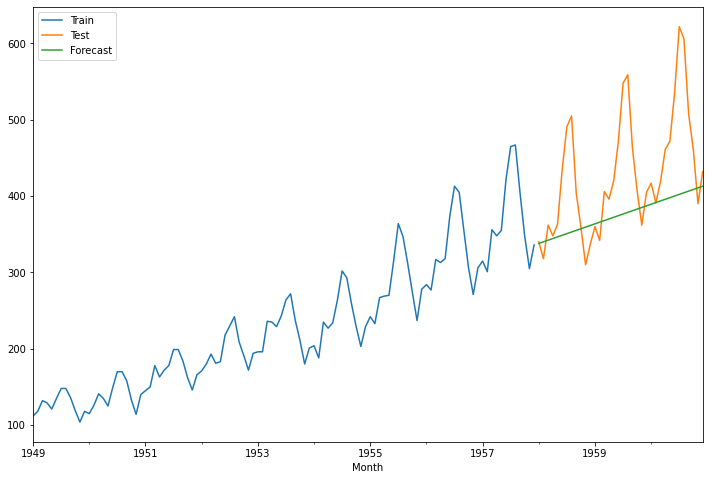

In [17]:
holt = ExponentialSmoothing(train['Passengers'],trend='add').fit()
holt_predictions = holt.forecast(36).rename('Holt Forecast')

train['Passengers'].plot(legend=True,label='Train')
test['Passengers'].plot(legend=True,label='Test',figsize=(12,8))
holt_predictions.plot(legend=True,label='Forecast')


In [18]:
# Forecast Accuracy Measures
rmse = round(np.sqrt(mean_squared_error(test,holt_predictions)),2)
print("Root Mean Squared Error (RMSE) =",rmse)

mae = round(mean_absolute_error(test,holt_predictions),2)
print("Mean Absolute Error (MAE) =",mae)

mape = round(100*mean_absolute_percentage_error(test,holt_predictions),2)
print("Mean Absolute Percentual Error (MAPE) =",mape,'%')

maen = round(mean_absolute_error(test[1:],test[:-1]),2)
print("Mean Absolute Error for Naive Forecast (MAEN) =",maen)


Root Mean Squared Error (RMSE) = 87.15
Mean Absolute Error (MAE) = 62.35
Mean Absolute Percentual Error (MAPE) = 12.89 %
Mean Absolute Error for Naive Forecast (MAEN) = 43.43


/Users/gabrieldiasmp/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
/Users/gabrieldiasmp/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


<AxesSubplot:xlabel='Month'>

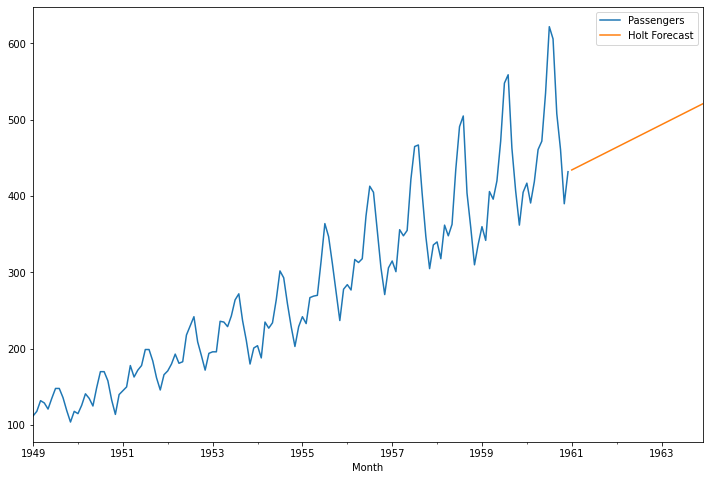

In [19]:
# Forecast the next 36 observations
holtf = ExponentialSmoothing(df['Passengers'],trend='add').fit()
forecasts = holtf.forecast(36).rename('Holt Forecast')
df['Passengers'].plot(legend=True,label='Passengers',figsize=(12,8))
forecasts.plot(legend=True,label='Holt Forecast')